In [4]:
from pathlib import Path
import lmdb
import io
from PIL import Image
import glob

# 데이터 셋({project_root}/dataset/test)에 있는 모든 데이터 셋 mldb 파일 경로를 수집
path_list = glob.glob(str(Path("./../dataset/test/").absolute()/"**/*.mdb"), recursive=True)

# 데이터 셋 확인
for i, path in enumerate(path_list):
    print(f"{i} {path}")

0 /home/MH2/PARSeq/test_codes/../dataset/test/ArT/data.mdb
1 /home/MH2/PARSeq/test_codes/../dataset/test/ArT/lock.mdb
2 /home/MH2/PARSeq/test_codes/../dataset/test/COCOv1.4/data.mdb
3 /home/MH2/PARSeq/test_codes/../dataset/test/COCOv1.4/lock.mdb
4 /home/MH2/PARSeq/test_codes/../dataset/test/CUTE80/data.mdb
5 /home/MH2/PARSeq/test_codes/../dataset/test/CUTE80/lock.mdb
6 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_857/data.mdb
7 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_857/lock.mdb
8 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_1015/data.mdb
9 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_1015/lock.mdb
10 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_1095/data.mdb
11 /home/MH2/PARSeq/test_codes/../dataset/test/IC13_1095/lock.mdb
12 /home/MH2/PARSeq/test_codes/../dataset/test/IC15_1811/data.mdb
13 /home/MH2/PARSeq/test_codes/../dataset/test/IC15_1811/lock.mdb
14 /home/MH2/PARSeq/test_codes/../dataset/test/IC15_2077/data.mdb
15 /home/MH2/PARSeq/test_codes/../dataset/

{'psize': 4096, 'depth': 2, 'branch_pages': 1, 'leaf_pages': 12, 'overflow_pages': 982, 'entries': 577}
b'288'
b'RONALDO'


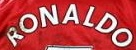

In [6]:
path = path_list[4] # 원하는 데이터 셋 경로
env = lmdb.open(str(Path(path).parent)) # lmdb 파일이 있는 디렉터리 경로를 줘야 함
with env.begin() as txn:
    print(txn.get("num-samples".encode()))
    print(txn.get(f"label-{1:09d}".encode()))
    buf = io.BytesIO(txn.get(f"image-{1:09d}".encode()))
    img = Image.open(buf)

img